In [1]:
import nlcc
import glob
import time
import pandas as pd
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
base_colors = ["e63946","f1faee","a8dadc","457b9d","1d3557"]
colors = ['#' + c for c in base_colors]
sns.set_style("white")
sns.set_style("ticks")
sns.set(rc={'axes.facecolor':'#f5f4e9', 
            'grid.color' : '#AAAAAA', 
            'axes.edgecolor':'#333333', 
            'figure.facecolor':'#FFFFFF', 
            'axes.grid': False,
            'axes.prop_cycle':   plt.cycler('color', plt.cm.Dark2.colors),
            'font.family': 'monospace'
           })

## Load Prompts

In [2]:
topic_categories = ['md', 'spectroscopy', 'bio', 'qm', 'sim', 'cheminf', 'genchem', 'thermo', 'stats', 'plot']
code_categories = ['code', 'human']
lang_categories = ['ch']
keys = ['name', 'language', 'context']

In [3]:
data = None
valid_files = []
def insert_row(r, data):
    if data is None:
        return {k: [v] for k,v in r.items()}
    return  {k: v + [r[k]] for k,v in data.items()}
for fn in glob.glob('../data/**/*.yml'):
    with open(fn, 'r') as f:
        d = yaml.safe_load(f)
        # slice        
        cat_str = d['categories'] 
        d = {k: d[k] for k in keys}
        # duplicate for categories
        tcs = [c for c in topic_categories if c in cat_str]
        ccs = [c for c in code_categories if c in cat_str]
        lcs = [c for c in lang_categories if c in cat_str]
        if len(lcs) == 0:
            lcs = ['en']
        if len(tcs) > 0:
            valid_files.append(fn)
        for tc in tcs:
            for cc in ccs:
                for lc in lcs:
                    d.update({'topic': tc, 'type': cc, 'natlang': lc})                    
                    data = insert_row(d, data)
                    
df = pd.DataFrame.from_dict(data)

In [4]:
df.groupby('topic').count()

,name,language,context,type,natlang
topic,,,,,
bio,11,11,11,11,11
cheminf,10,10,10,10,10
genchem,11,11,11,11,11
md,10,10,10,10,10
plot,10,10,10,10,10
qm,6,6,6,6,6
sim,4,4,4,4,4
spectroscopy,4,4,4,4,4
stats,10,10,10,10,10


## Programmatic Prompts

In [5]:
you sure you want to run this again?
paths = ' '.join(valid_files)
temperatures = [0.05, 0.2, 0.5]
k = 5
for i,t in enumerate(temperatures):    
    out = f'override_bench_{i}.csv'
    !nlcc-bench $paths $out --n $k --prompt python --temperature $t
    print('done')
    out = f'bench_{i}.csv'
    !nlcc-bench $paths $out --n $k --temperature $t    
    #!nlcc-bench $paths override_bench_$i.csv --n $k --prompt python --temperature $t

../data/aa_polarity/aa_polarity.yml
../data/alignment/alignment.yml
/home/whitead/miniconda3/envs/mmm/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
'Trajectory' object does not support item assignment
'Trajectory' object does not support item assignment
../data/aromatic_aa/aromatic_aa.yml
../data/arrhenius/arrhenius.yml
../data/bimolecular_rate/bimolecular.yml
../data/blast/blast.yml
Error message from NCBI: Message ID#24 Error: Failed to read the Blast query: Protein FASTA provided for nucleotide sequence
Error message from NCBI: Message ID#24 Error: Failed to read the Blast query: Protein FASTA provided for nucleotide sequence
cannot unpack non-iterable NoneType object
cannot unpack non-iterable NoneType object
Error message from NCBI: Message ID#24 Error: Fail

../data/plot_scatter_pointsize/plot_pointsize.yml
name 'plt' is not defined
name 'np' is not defined
name 'figure' is not defined
name 'figure' is not defined
name 'plt' is not defined
../data/plot_sin/plot_sin.yml
../data/plot_sin_polar/plot_sin_polar.yml
../data/pred-interval/pred_interval.yml
../data/protein-render/protein-render.yml
../data/pubchem/pubchem.yml
../data/pyscf_energy/pyscf_energy.yml
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
../data/qed/qed.yml
name 'Chem' is not defined
name 'Chem' is not defined
name 'Chem' is not defined
name 'Chem' is not defined
name 'Chem' is not defined
../data/quantile/quantile.yml
The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
The truth v

../data/langevin/LD.yml
<string>:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
<string>:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
<string>:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
<string>:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
<string>:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
../data/lipinski/lipinski.yml
../data/mape/mape.yml
../data/mapping_operator/mapping_operator.yml
only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (

ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
../data/substructure/substructure.yml
../data/tanimoto/tanimoto.yml
name 'DataStructs' is not defined
../data/unbdistance/unbdistance.yml
'numpy.ndarray' object has no attribute 'n_frames'
'numpy.ndarray' object has no attribute 'n_frames'
../data/aa_polarity/aa_polarity.yml
../data/alignment/alignment.yml
/home/whitead/miniconda3/envs/mmm/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
too many indices for array: array is 1-dimensional, but 2 were indexed


name 'np' is not defined
name 'np' is not defined
name 'np' is not defined
name 'np' is not defined
../data/plot_dual_axis/plot_dual_axis.yml
name 'plt' is not defined
name 'np' is not defined
name 'np' is not defined
name 'np' is not defined
../data/plot_emoji/plot_emoji.yml
name 'plt' is not defined
Unrecognized marker style '☺'
name 'np' is not defined
name 'plt' is not defined
../data/plot_outside_legend/plot_outside_legend.yml
No handles with labels found to put in legend.
name 'norm' is not defined
../data/plot_scatter_pointsize/plot_pointsize.yml
name 'plt' is not defined
name 'np' is not defined
<string>:53: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
invalid syntax (<string>, line 32)
name 'plt' is not defined
../data/plot_sin/plot_sin.yml
../data/plot_sin_polar/plot_sin_polar.yml
invalid syntax (<string>, line 115)
../data/pred-inter

../data/force-const/force_const.yml
ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
name 'const' is not defined
../data/freezing_depression/freezing_depression.yml
../data/gaussian_input_emin/gaussian_input_emin.yml
../data/genpos/genpos.yml
'NoneType' object is not subscriptable
list index out of range
ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
'NoneType' object has no attribute 'text'
list index out of range
../data/hydrophobic_res/hydrophobic_res.yml
../data/ideal_gas/ideal_gas.yml
../data/iupac2smiles/iupac2smiles.yml
[15:30:07] SMILES Parse Error: syntax error while parsing: 2,5,5-trimethyl-2-hexene
[15:30:07] SMILES Parse Error: Failed parsing SMILES '2,5,5-trimethyl-2-hexene' for input: '2,5,5-trimethyl-2-hexene'
Python argument types in
    rdkit.Chem.rdmolfi

<string>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
<string>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
../data/pred-interval/pred_interval.yml
../data/protein-render/protein-render.yml
../data/pubchem/pubchem.yml
../data/pyscf_energy/pyscf_energy.yml
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write

../data/iupac2smiles/iupac2smiles.yml
name 'Chem' is not defined
name 'Chem' is not defined
[15:39:27] SMILES Parse Error: syntax error while parsing: 2,5,5-trimethyl-2-hexene
[15:39:27] SMILES Parse Error: Failed parsing SMILES '2,5,5-trimethyl-2-hexene' for input: '2,5,5-trimethyl-2-hexene'
Python argument types in
    rdkit.Chem.rdmolops.AddHs(NoneType)
did not match C++ signature:
    AddHs(RDKit::ROMol mol, bool explicitOnly=False, bool addCoords=False, boost::python::api::object onlyOnAtoms=None, bool addResidueInfo=False)
name 'Chem' is not defined
../data/kld_loss/kld.yml
../data/langevin/LD.yml
../data/lipinski/lipinski.yml
module 'rdkit.Chem' has no attribute 'Crippen'
module 'rdkit.Chem' has no attribute 'Crippen'
module 'rdkit.Chem' has no attribute 'Crippen'
module 'rdkit.Chem' has no attribute 'Crippen'
module 'rdkit.Chem' has no attribute 'Crippen'
../data/mape/mape.yml
ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any 

'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
../data/qed/qed.yml
name 'Chem' is not defined
name 'Chem' is not defined
name 'Chem' is not defined
name 'Chem' is not defined
name 'Chem' is not defined
../data/quantile/quantile.yml
object of type 'float' has no len()
The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
invalid syntax (<string>, line 23)
int() argument must be a string, a bytes-like object or a number, not 'list'
The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
../data/random_walk/random_walk.yml
name 'random' is not defined
name 'random' is not defined
name 'random' is not defined
name 'random' is not defined
../data/rm-water/remove-water-ch.yml
The topology and the trajectory files might not contain the same atoms
The inpu

[15:51:05] SMILES Parse Error: Failed parsing SMILES '2,5,5-trimethyl-2-hexene' for input: '2,5,5-trimethyl-2-hexene'
Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)
[15:51:05] SMILES Parse Error: syntax error while parsing: 2,5,5-trimethyl-2-hexene
[15:51:05] SMILES Parse Error: Failed parsing SMILES '2,5,5-trimethyl-2-hexene' for input: '2,5,5-trimethyl-2-hexene'
Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
   

../data/pred-interval/pred_interval.yml
Rate limit exceeded (even though we limit!), retrying...
../data/protein-render/protein-render.yml
../data/pubchem/pubchem.yml
'PropertyTable'
Invalid status code 400 for CC=C=C(C(=O)N)
../data/pyscf_energy/pyscf_energy.yml
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
'NoneType' object has no attribute 'write'
../data/qed/qed.yml
name 'np' is not defined
invalid syntax (<string>, line 25)
[Errno 2] No such file or directory: 'smiles.txt'
invalid syntax (<string>, line 141)
No registered converter was able to produce a C++ rvalue of type std::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type Mol
../data/quantile/quantile.yml
operands could not be broadcast together with shapes (300,) (3,) 
The truth value of an array with more than one element is ambiguous. Use a.any

In [6]:
merged = None
for i,t in enumerate(temperatures):
    f = f'override_bench_{i}.csv'
    bf = pd.read_csv(f, delim_whitespace=True)    
    bf = pd.merge(bf, df, how='inner', on='name')
    bf.context.values[:] = 'none'
    if merged is None:
        merged = bf
    else:
        merged = pd.concat((merged, bf))
    f = f'bench_{i}.csv'
    bf = pd.read_csv(f, delim_whitespace=True)    
    bf = pd.merge(bf, df, how='inner', on='name')
    merged = pd.concat((merged, bf))

merged = merged.assign(used_context=merged.context.apply(lambda c : 'none' if c == 'none' else 'custom'))
merged.to_pickle('promp_results.pkl')

/home/whitead/miniconda3/envs/mmm/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/whitead/miniconda3/envs/mmm/lib/python3.8/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 360x360 with 0 Axes>

<Figure size 808.55x288 with 10 Axes>

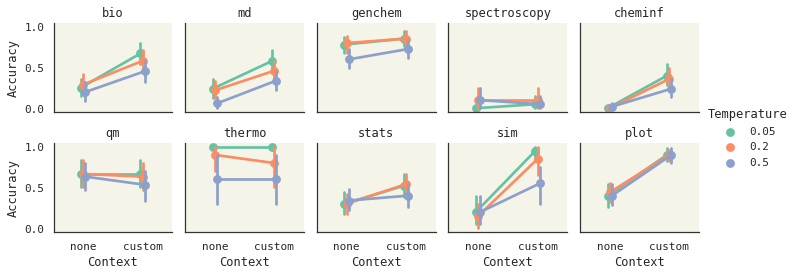

In [14]:
plt.figure(figsize=(4,4), dpi=90)
g = sns.FacetGrid(merged, col='topic', col_wrap=5, height=2, hue_order=temperatures)
g.map(sns.pointplot, 'used_context', 'result', 'temperature', 
      palette='Set2', dodge=True)
g.add_legend(title='Temperature')
g.set_axis_labels('Context', 'Accuracy')
g.set_titles('{col_name}')
g.savefig('accuracy.pdf')

/home/whitead/miniconda3/envs/mmm/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 360x360 with 0 Axes>

<Figure size 808.55x288 with 10 Axes>

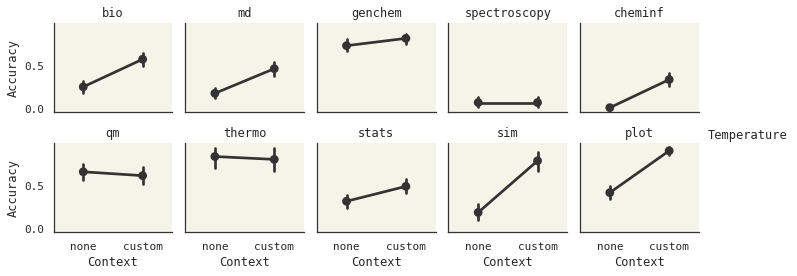

In [15]:
plt.figure(figsize=(4,4), dpi=90)
g = sns.FacetGrid(merged, col='topic', col_wrap=5, height=2)
g.map(sns.pointplot, 'used_context', 'result', dodge=True, color='#333')
g.add_legend(title='Temperature')
g.set_axis_labels('Context', 'Accuracy')
g.set_titles('{col_name}')
g.savefig('marginal_accuracy.pdf')

In [34]:
print(df.groupby('topic').count().iloc[:,0].to_latex())

\begin{tabular}{lr}
\toprule
{} &  name \\
topic        &       \\
\midrule
bio          &    11 \\
cheminf      &    10 \\
genchem      &    11 \\
md           &    10 \\
plot         &    10 \\
qm           &     6 \\
sim          &     4 \\
spectroscopy &     4 \\
stats        &    10 \\
thermo       &     2 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_20762/4145006304.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.groupby('topic').count().iloc[:,0].to_latex())
